In [173]:
import warnings
warnings.filterwarnings('ignore')

In [174]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [175]:
pd.set_option('display.max_rows', 500)

### Reading and Understanding the data

In [176]:
churn=pd.read_csv("telecom_churn_data.csv")
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [177]:
churn.shape

(99999, 226)

In [178]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [179]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Checking and handling missing values

In [180]:
churn_missing_col=round(100*churn.isnull().sum()/len(churn.index),2)
churn_missing_col

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [181]:
#removing columns with missing values>30
cols=churn.columns
for i in cols:
     if((100*(churn[i].isnull().sum()/len(churn.index))) >= 30):
            churn.drop(i, 1, inplace = True)

In [182]:
churn.shape

(99999, 186)

### Deleting the date columns as they are not required in the analysis

In [183]:
date_cols = [k for k in churn.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [184]:
# Dropping date columns
churn = churn.drop(date_cols, axis=1)

### Dropping circle_id column as this column has only one unique value. 
Hence there will be no impact of this column on the data analysis.

In [185]:
# Drop circle_id column
churn = churn.drop('circle_id', axis=1)

In [186]:
churn.shape

(99999, 177)

### Filter high-value customers

In [187]:
#Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.
churn['avg_rech_amt_6_7'] = (churn['total_rech_amt_6'] + churn['total_rech_amt_7'])/2

In [188]:
#Finding the 70th percentile of the avg_rech_amt_6_7
x=churn['avg_rech_amt_6_7'].quantile(0.7)
x

368.5

In [189]:
#Finding the customers, who have recharged more than or equal to X
churn=churn[churn['avg_rech_amt_6_7']>=x]
churn.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [190]:
churn.shape

(30011, 178)

<span style='color: green;'>We are left with approx ~30k after filtering</span>

### Handling missing values in rows

In [191]:
churn_missing_rows_50=churn[(churn.isnull().sum(axis=1))>(len(churn.columns)//2)]
churn_missing_rows_50.shape

(114, 178)

In [192]:
# Deleting the rows having more than 50% missing values
churn = churn.drop(churn_missing_rows_50.index)
churn.shape

(29897, 178)

In [193]:
# Rechecking the missing values in columns
churn_missing_columns = (round(((churn.isnull().sum()/len(churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
churn_missing_columns

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
loc_og_t2f_mou_9,5.32
loc_og_t2c_mou_9,5.32
std_ic_t2m_mou_9,5.32
loc_og_mou_9,5.32
std_og_t2t_mou_9,5.32


- Looks like MOU for all the types of calls for the month of September (9) have missing values together for any particular record.

- Lets check the records for the MOU for Sep(9), in which these coulmns have missing values together.

In [194]:
# Listing the columns of MOU Sep(9)
print(((churn_missing_columns[churn_missing_columns['null'] == 5.32]).index).to_list())

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [195]:
# Creating a dataframe with the condition, in which MOU for Sep(9) are null
churn_null_mou_9 = churn[(churn['loc_og_t2m_mou_9'].isnull()) & (churn['loc_ic_t2f_mou_9'].isnull()) & (churn['roam_og_mou_9'].isnull()) & (churn['std_ic_t2m_mou_9'].isnull()) &
  (churn['loc_og_t2t_mou_9'].isnull()) & (churn['std_ic_t2t_mou_9'].isnull()) & (churn['loc_og_t2f_mou_9'].isnull()) & (churn['loc_ic_mou_9'].isnull()) &
  (churn['loc_og_t2c_mou_9'].isnull()) & (churn['loc_og_mou_9'].isnull()) & (churn['std_og_t2t_mou_9'].isnull()) & (churn['roam_ic_mou_9'].isnull()) &
  (churn['loc_ic_t2m_mou_9'].isnull()) & (churn['std_og_t2m_mou_9'].isnull()) & (churn['loc_ic_t2t_mou_9'].isnull()) & (churn['std_og_t2f_mou_9'].isnull()) & 
  (churn['std_og_t2c_mou_9'].isnull()) & (churn['og_others_9'].isnull()) & (churn['std_og_mou_9'].isnull()) & (churn['spl_og_mou_9'].isnull()) & 
  (churn['std_ic_t2f_mou_9'].isnull()) & (churn['isd_og_mou_9'].isnull()) & (churn['std_ic_mou_9'].isnull()) & (churn['offnet_mou_9'].isnull()) & 
  (churn['isd_ic_mou_9'].isnull()) & (churn['ic_others_9'].isnull()) & (churn['std_ic_t2o_mou_9'].isnull()) & (churn['onnet_mou_9'].isnull()) & 
  (churn['spl_ic_mou_9'].isnull())]

churn_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.000,0.0,55.19,3.26,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,0.0,0.0,0.0,695.609,39.981,0.000,0.0,1325.91,28.61,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
188,7000340381,0.0,0.0,0.0,734.641,183.668,0.000,0.0,4.38,0.98,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0


In [196]:
churn_null_mou_9.shape

(1590, 178)

In [197]:
# Deleting the records for which MOU for Sep(9) are null
churn = churn.drop(churn_null_mou_9.index)

In [198]:
# Again Cheking percent of missing values in columns
churn_missing_columns = (round(((churn.isnull().sum()/len(churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
churn_missing_columns

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
loc_ic_t2f_mou_8,0.55
loc_og_t2t_mou_8,0.55
std_ic_t2f_mou_8,0.55
std_og_t2m_mou_8,0.55
loc_og_t2m_mou_8,0.55


- Looks like MOU for all the types of calls for the month of August(8) have missing values together for any particular record.
- Lets check the records for the MOU for August(8), in which these coulmns have missing values together.

In [199]:
# Listing the columns of MOU Aug(8)
print(((churn_missing_columns[churn_missing_columns['null'] == 0.55]).index).to_list())

['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8', 'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8', 'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8']


In [200]:
# Creating a dataframe with the condition, in which MOU for Aug(8) are null
churn_null_mou_8 = churn[(churn['loc_og_t2m_mou_8'].isnull()) & (churn['loc_ic_t2f_mou_8'].isnull()) & (churn['roam_og_mou_8'].isnull()) & (churn['std_ic_t2m_mou_8'].isnull()) &
  (churn['loc_og_t2t_mou_8'].isnull()) & (churn['std_ic_t2t_mou_8'].isnull()) & (churn['loc_og_t2f_mou_8'].isnull()) & (churn['loc_ic_mou_8'].isnull()) &
  (churn['loc_og_t2c_mou_8'].isnull()) & (churn['loc_og_mou_8'].isnull()) & (churn['std_og_t2t_mou_8'].isnull()) & (churn['roam_ic_mou_8'].isnull()) &
  (churn['loc_ic_t2m_mou_8'].isnull()) & (churn['std_og_t2m_mou_8'].isnull()) & (churn['loc_ic_t2t_mou_8'].isnull()) & (churn['std_og_t2f_mou_8'].isnull()) & 
  (churn['std_og_t2c_mou_8'].isnull()) & (churn['og_others_8'].isnull()) & (churn['std_og_mou_8'].isnull()) & (churn['spl_og_mou_8'].isnull()) & 
  (churn['std_ic_t2f_mou_8'].isnull()) & (churn['isd_og_mou_8'].isnull()) & (churn['std_ic_mou_8'].isnull()) & (churn['offnet_mou_8'].isnull()) & 
  (churn['isd_ic_mou_8'].isnull()) & (churn['ic_others_8'].isnull()) & (churn['std_ic_t2o_mou_8'].isnull()) & (churn['onnet_mou_8'].isnull()) & 
  (churn['spl_ic_mou_8'].isnull())]

churn_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,...,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,...,0,0,0,0,274,0.0,0.0,0.0,0.0,468.5
788,7000636808,0.0,0.0,0.0,532.742,546.756,0.0,269.274,1173.39,891.83,...,0,0,0,0,936,0.0,0.0,0.0,0.0,604.0
1802,7000516213,0.0,0.0,0.0,810.455,0.000,0.0,0.000,91.33,NaN,...,0,0,0,0,755,0.0,0.0,0.0,0.0,477.5
4837,7002192662,0.0,0.0,0.0,649.150,149.572,0.0,0.250,1354.24,85.13,...,0,0,0,0,520,0.0,0.0,0.0,0.0,421.0


In [201]:
churn_null_mou_8.shape

(157, 178)

In [202]:
#Deleting MOU of Aug(8) which has null values
churn=churn.drop(churn_null_mou_8.index)

In [203]:
#Again checking % of missing values in columns
churn_missing_columns = (round(((churn.isnull().sum()/len(churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
churn_missing_columns

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
loc_og_t2c_mou_6,0.44
loc_ic_t2m_mou_6,0.44
isd_og_mou_6,0.44
loc_og_t2t_mou_6,0.44
std_og_t2m_mou_6,0.44


- Looks like MOU for all the types of calls for the month of June(6) have missing values together for any particular record.
- Lets check the records for the MOU for Jun(6), in which these coulmns have missing values together.

In [204]:
# Listing the columns of MOU Jun(6)
print(((churn_missing_columns[churn_missing_columns['null'] == 0.44]).index).to_list())

['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6', 'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6', 'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6', 'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6', 'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6', 'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6']


In [205]:
# Creating a dataframe with the condition, in which MOU for Jun(6) are null
churn_null_mou_6 = churn[(churn['loc_og_t2m_mou_6'].isnull()) & (churn['loc_ic_t2f_mou_6'].isnull()) & (churn['roam_og_mou_6'].isnull()) & (churn['std_ic_t2m_mou_6'].isnull()) &
  (churn['loc_og_t2t_mou_6'].isnull()) & (churn['std_ic_t2t_mou_6'].isnull()) & (churn['loc_og_t2f_mou_6'].isnull()) & (churn['loc_ic_mou_6'].isnull()) &
  (churn['loc_og_t2c_mou_6'].isnull()) & (churn['loc_og_mou_6'].isnull()) & (churn['std_og_t2t_mou_6'].isnull()) & (churn['roam_ic_mou_6'].isnull()) &
  (churn['loc_ic_t2m_mou_6'].isnull()) & (churn['std_og_t2m_mou_6'].isnull()) & (churn['loc_ic_t2t_mou_6'].isnull()) & (churn['std_og_t2f_mou_6'].isnull()) & 
  (churn['std_og_t2c_mou_6'].isnull()) & (churn['og_others_6'].isnull()) & (churn['std_og_mou_6'].isnull()) & (churn['spl_og_mou_6'].isnull()) & 
  (churn['std_ic_t2f_mou_6'].isnull()) & (churn['isd_og_mou_6'].isnull()) & (churn['std_ic_mou_6'].isnull()) & (churn['offnet_mou_6'].isnull()) & 
  (churn['isd_ic_mou_6'].isnull()) & (churn['ic_others_6'].isnull()) & (churn['std_ic_t2o_mou_6'].isnull()) & (churn['onnet_mou_6'].isnull()) & 
  (churn['spl_ic_mou_6'].isnull())]

churn_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,...,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,...,0,0,1,0,424,0.00,0.00,0.00,0.00,485.0
423,7000635248,0.0,0.0,0.0,213.802,304.194,149.710,329.643,NaN,0.00,...,0,0,0,0,945,73.55,266.94,63.04,0.00,421.5
934,7002152278,0.0,0.0,0.0,48.000,764.152,500.030,194.400,NaN,14.24,...,0,0,2,1,490,188.83,215.00,0.00,24.18,651.0
1187,7000486275,0.0,0.0,0.0,0.000,757.170,995.719,0.000,NaN,1366.71,...,0,0,0,0,737,0.00,0.00,0.00,0.00,441.5


In [206]:
churn_null_mou_6.shape

(124, 178)

In [207]:
#Deleting MOU of Jun(6) which has null values
churn=churn.drop(churn_null_mou_6.index)

In [208]:
#Again checking % of missing values in columns
churn_missing_columns = (round(((churn.isnull().sum()/len(churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
churn_missing_columns

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
std_og_t2t_mou_7,0.12
std_og_t2f_mou_7,0.12
std_og_t2c_mou_7,0.12
std_og_mou_7,0.12
ic_others_7,0.12


- Repeating the same process for July(7)
- Looks like MOU for all the types of calls for the month of July(7) have missing values together for any particular record.
- Lets check the records for the MOU for July(7), in which these coulmns have missing values together.

In [209]:
# Listing the columns of MOU Jun(6)
print(((churn_missing_columns[churn_missing_columns['null'] == 0.12]).index).to_list())

['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7', 'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7', 'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7', 'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7', 'offnet_mou_7']


In [210]:
# Creating a dataframe with the condition, in which MOU for July(7) are null
churn_null_mou_7 = churn[(churn['loc_og_t2m_mou_7'].isnull()) & (churn['loc_ic_t2f_mou_7'].isnull()) & (churn['roam_og_mou_7'].isnull()) & (churn['std_ic_t2m_mou_7'].isnull()) &
  (churn['loc_og_t2t_mou_7'].isnull()) & (churn['std_ic_t2t_mou_7'].isnull()) & (churn['loc_og_t2f_mou_7'].isnull()) & (churn['loc_ic_mou_7'].isnull()) &
  (churn['loc_og_t2c_mou_7'].isnull()) & (churn['loc_og_mou_7'].isnull()) & (churn['std_og_t2t_mou_7'].isnull()) & (churn['roam_ic_mou_7'].isnull()) &
  (churn['loc_ic_t2m_mou_7'].isnull()) & (churn['std_og_t2m_mou_7'].isnull()) & (churn['loc_ic_t2t_mou_7'].isnull()) & (churn['std_og_t2f_mou_7'].isnull()) & 
  (churn['std_og_t2c_mou_7'].isnull()) & (churn['og_others_7'].isnull()) & (churn['std_og_mou_7'].isnull()) & (churn['spl_og_mou_7'].isnull()) & 
  (churn['std_ic_t2f_mou_7'].isnull()) & (churn['isd_og_mou_7'].isnull()) & (churn['std_ic_mou_7'].isnull()) & (churn['offnet_mou_7'].isnull()) & 
  (churn['isd_ic_mou_7'].isnull()) & (churn['ic_others_7'].isnull()) & (churn['std_ic_t2o_mou_7'].isnull()) & (churn['onnet_mou_7'].isnull()) & 
  (churn['spl_ic_mou_7'].isnull())]

churn_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,...,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,...,0,0,0,0,672,0.00,0.0,0.0,0.00,603.0
9955,7001658068,0.0,0.0,0.0,925.028,189.000,789.761,445.707,46.39,NaN,...,0,0,0,0,3107,0.00,0.0,0.0,0.00,692.5
10724,7001391499,0.0,0.0,0.0,894.818,85.000,207.040,363.314,117.21,NaN,...,0,0,0,0,2664,0.00,0.0,0.0,0.00,510.0
12107,7000131738,0.0,0.0,0.0,1803.475,0.000,0.600,25.243,1742.61,NaN,...,0,0,0,0,219,0.00,0.0,0.0,0.00,995.0


In [211]:
churn_null_mou_7.shape

(35, 178)

In [212]:
#Deleting MOU of July(7) which has null values
churn=churn.drop(churn_null_mou_7.index)

In [213]:
#Again checking % of missing values in columns
churn_missing_columns = (round(((churn.isnull().sum()/len(churn.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
churn_missing_columns

,null
mobile_number,0.0
total_rech_num_7,0.0
std_ic_mou_7,0.0
std_ic_mou_8,0.0
std_ic_mou_9,0.0
total_ic_mou_6,0.0
total_ic_mou_7,0.0
total_ic_mou_8,0.0
total_ic_mou_9,0.0
spl_ic_mou_6,0.0


### We are left with no missing values in any columns now

In [214]:
churn.shape

(27991, 178)

In [215]:
#Checking % of rows we are left with after filtering
round(1-(len(churn.index)/30011),2)

0.07

### <span style='color: green;'>We have lost 7% of rows</span>
- But still we have enough records to do our analysis

### Tagging churners ( churn= 1 else 0)

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [216]:
churn['churn'] = np.where((churn['total_ic_mou_9']==0) & (churn['total_og_mou_9']==0) & (churn['vol_2g_mb_9']==0) & (churn['vol_3g_mb_9']==0), 1, 0)

In [217]:
churn.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


### Deleting all the attributes corresponding to the churn phase

In [218]:
# List the columns for churn month(9)
col_9 = [col for col in churn.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [219]:
# Deleting the churn month columns
churn = churn.drop(col_9, axis=1)

In [220]:
# Dropping sep_vbc_3g column
churn = churn.drop('sep_vbc_3g', axis=1)

In [221]:
#Checking churn percentage
round(100*(churn['churn'].mean()),2)

3.39

- There is only 3.39% of churn, which is very less. 
- Class imbalance will be taken care later

### Outliers treatment
In the filtered dataset except mobile_number and churn columns all the columns are numeric types. Hence, converting mobile_number and churn datatype to object.

In [222]:
churn['mobile_number'] = churn['mobile_number'].astype(object)
churn['churn'] = churn['churn'].astype(object)

In [223]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27991 entries, 8 to 99997
Columns: 136 entries, mobile_number to churn
dtypes: float64(109), int64(25), object(2)
memory usage: 29.3+ MB


In [224]:
# List only the numeric columns
numeric_cols = churn.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_amt_6_7'],
      dtype='object', length=134)


In [225]:
# Removing outliers below 10th and above 90th percentile
for col in numeric_cols: 
    q1 = churn[col].quantile(0.10)
    q3 = churn[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    data = churn.loc[(churn[col] > range_low) & (churn[col] < range_high)]

data.shape

(27705, 136)

### Feature Engineering

In [226]:
# Listubg the columns of total mou, rech_num and rech_amt
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

### Deriving new column (decrease_mou_action)
This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [227]:
# Total mou at good phase incoming and outgoing
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [228]:
# Avg. mou at action phase
# We are taking average because there are two months(7 and 8) in action phase
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [229]:
# Difference avg_mou_good and avg_mou_action
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [230]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [231]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,511,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,667,0.00,0.00,0.00,408.0,0,1341.41,1.560,-1339.850,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,720,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0


### Deriving new column (decrease_rech_num_action)
This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [232]:
# Avg rech number at action phase
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [233]:
# Difference total_rech_num_6 and avg_rech_action
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [234]:
# Checking if rech_num has decreased in action phase
data['decrease_rech_num_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [235]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,avg_rech_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,21.89,459.0,0,711.67,597.705,-113.965,1,4.0,-6.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,408.0,0,1341.41,1.560,-1339.850,1,3.0,-16.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0


### Deriving new column (decrease_rech_amt_action)
This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [236]:
# Avg rech_amt in action phase
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [237]:
# Difference of action phase rech amt and good phase rech amt
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [238]:
# Checking if rech_amt has decreased in action phase
data['decrease_rech_amt_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0) 

In [239]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,711.67,597.705,-113.965,1,4.0,-6.0,1,254.0,-316.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1341.41,1.560,-1339.850,1,3.0,-16.0,1,15.0,-801.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,1067.43,1245.130,177.700,0,26.5,4.5,0,699.0,99.0,0


### Deriving new column (decrease_arpu_action)
This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [240]:
# ARUP in action phase
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [241]:
# Difference of good and action phase ARPU
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [242]:
# Checking whether the arpu has decreased on the action month
data['decrease_arpu_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [243]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_mou_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,4.0,-6.0,1,254.0,-316.0,1,243.8815,-187.0935,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,3.0,-16.0,1,15.0,-801.0,1,22.2395,-667.7685,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,26.5,4.5,0,699.0,99.0,0,617.7565,103.3035,0


### Deriving new column (decrease_vbc_action
This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [244]:
# VBC in action phase
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

# Difference of good and action phase VBC
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

# Checking whether the VBC has decreased on the action month
data['decrease_vbc_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,15.0,-801.0,1,22.2395,-667.7685,1,0.000,0.000,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,699.0,99.0,0,617.7565,103.3035,0,0.000,0.000,0


### EDA

### Univariate Analysis
- Churn rate on the basis whether the customer decreased her/his MOU in action month

In [245]:
#Converting churn column to int in order to do aggfunc in the pivot table
data['churn'] = data['churn'].astype('int64')

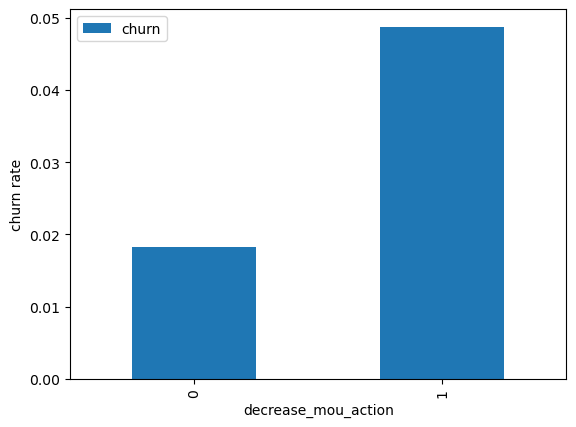

In [246]:
data.pivot_table(values='churn', index='decrease_mou_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

### <span style='color: green;'>Analysis</span>
- We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.



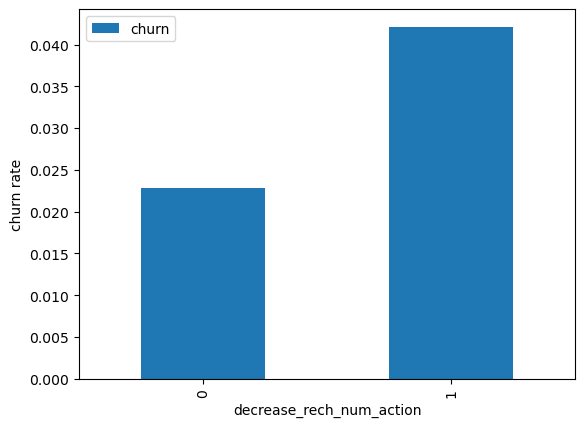

In [247]:
#Churn rate on the basis whether the customer decreased her/his number of recharge in action month
data.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

### <span style='color: green;'>Analysis</span>
- As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

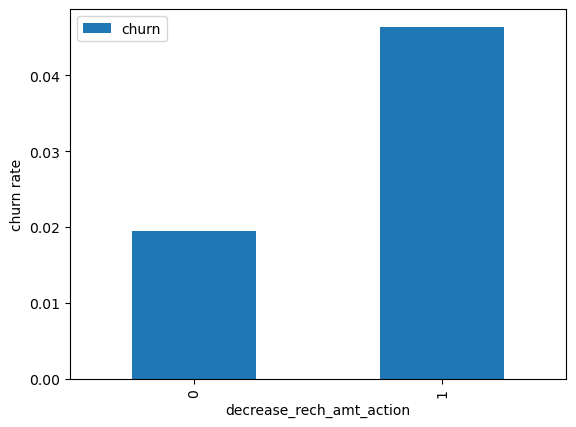

In [248]:
#Churn rate on the basis whether the customer decreased her/his amount of recharge in action month
data.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

### <span style='color: green;'>Analysis</span>
- Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

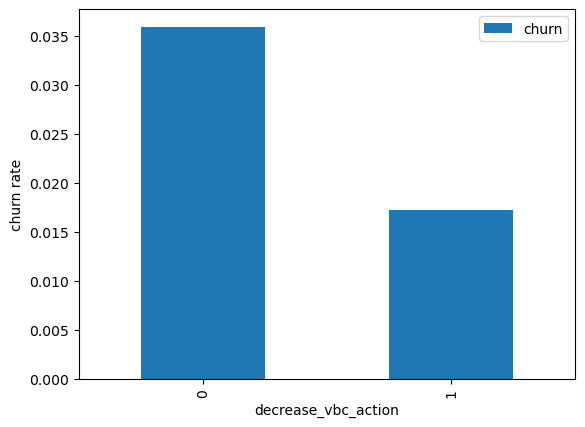

In [249]:
#Churn rate on the basis whether the customer decreased her/his volume based cost in action month
data.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

### <span style='color: green;'>Analysis</span>
- Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

## Analysis of the average revenue per customer (churn and not churn) in the action phase

In [250]:
# Creating churn dataframe
data_churn = data[data['churn'] == 1]
# Creating not churn dataframe
data_non_churn = data[data['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

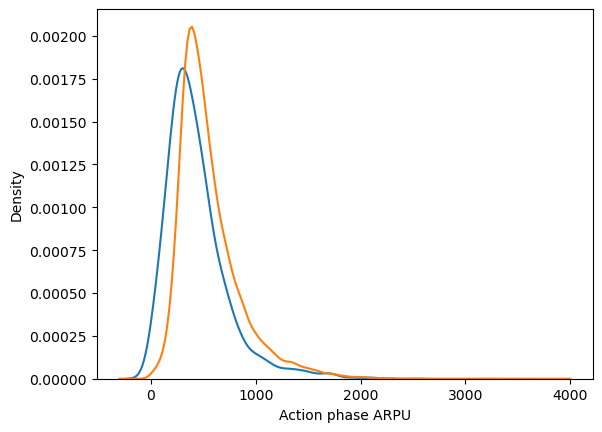

In [251]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

- Average revenue per user (ARPU) for the churned customers is mostly densed on the 0 to 900. The higher ARPU customers are less likely to be churned.
- ARPU for the not churned customers is mostly densed on the 0 to 1000.

*Analysis of the minutes of usage MOU (churn and not churn) in the action phase*

[Text(0.5, 0, 'Action phase MOU')]

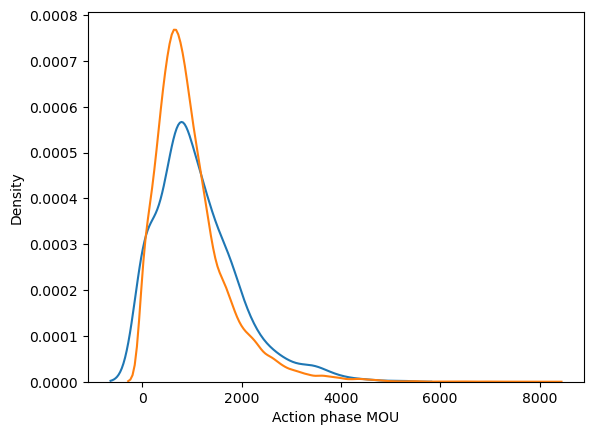

In [252]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

- Minutes of usage(MOU) of the churn customers is mostly populated on the 0 to 2500 range. Higher the MOU, lesser the churn probability.

### Bivariate analysis

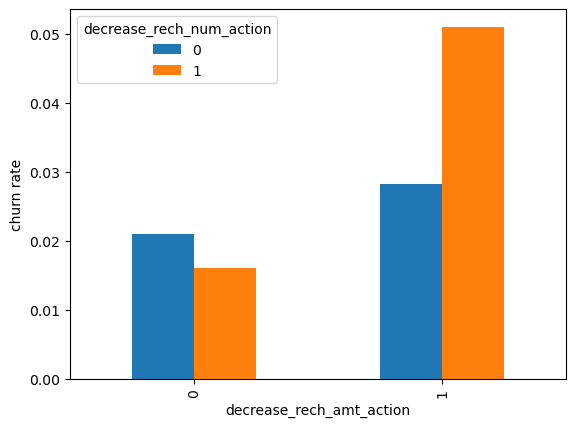

In [253]:
#Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

### <span style='color: green;'>Analysis</span>
- We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

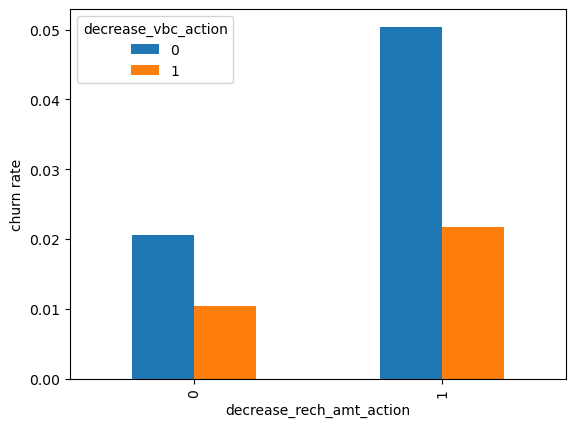

In [254]:
#Analysis of churn rate by the decreasing recharge amount and volume based cost in the action phase
data.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

### <span style='color: green;'>Analysis</span>
Here, also we can see that the churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month.

In [255]:
#Dropping few derived columns, which are not required in further analysis
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avg_rech_amt_6_7'], axis=1)

### Train-Test Split

In [256]:
from sklearn.model_selection import train_test_split
X = data.drop(['mobile_number','churn'], axis=1)
y = data['churn']

# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with data imbalance
- We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [257]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

# # Instantiate SMOTE
sm = SMOTE(random_state=27)

# # Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling

In [258]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [259]:
# Instantiate the Scaler
scaler = StandardScaler()

In [260]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()

In [261]:
# Removing the derived binary columns 
cols_scale.remove('decrease_mou_action')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [262]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [263]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
0,0.0,0.0,0.0,0.140777,-0.522792,-0.276289,0.106540,-0.662084,-0.465777,-0.211202,...,-0.113882,-0.361238,-0.236209,-0.265392,0.110582,1,1,1,1,1
1,0.0,0.0,0.0,-1.427243,4.428047,3.254270,-0.658491,-0.236590,-0.004450,-0.776075,...,-0.113882,-0.790173,-0.255884,-0.265392,-0.259366,0,0,0,0,0
2,0.0,0.0,0.0,-0.222751,0.543206,0.809117,-0.601239,-0.599206,-0.331043,-0.363395,...,2.526725,1.571302,3.307334,2.691063,1.700218,1,0,0,0,0
3,0.0,0.0,0.0,-0.911173,0.842273,0.731302,-0.702232,-0.650471,-0.458464,-0.789784,...,-0.113882,-0.951024,-0.255884,-0.265392,-0.259366,0,0,0,0,0
4,0.0,0.0,0.0,0.271356,0.247684,1.256421,-0.356392,-0.180394,0.114727,0.899204,...,-0.113882,-0.519757,-0.255884,-0.265392,-0.259366,0,0,0,0,0


### Scaling the test set

In [264]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_action,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,decrease_vbc_action
5704,0.0,0.0,0.0,0.244310,-0.268832,1.005890,-0.725286,-0.690223,-0.476634,0.483540,...,2.526725,0.225051,0.018023,0.194794,-0.259366,0,0,1,1,0
64892,0.0,0.0,0.0,0.048359,-0.779609,-0.157969,-0.734066,-0.698072,-0.502219,-0.358555,...,-0.113882,0.622516,2.423668,2.357564,5.861151,1,1,1,1,1
39613,0.0,0.0,0.0,0.545470,0.184388,1.403349,-0.537110,-0.521615,-0.206890,0.694901,...,-0.113882,2.966507,-0.255884,-0.265392,-0.259366,1,1,1,0,0
93118,0.0,0.0,0.0,0.641508,0.816632,-0.211023,-0.058843,0.029897,-0.155872,-0.148197,...,-0.113882,1.742643,-0.255884,-0.265392,-0.259366,1,0,1,1,0
81235,0.0,0.0,0.0,3.878627,0.911619,2.745295,4.117829,1.452446,2.809582,-0.002634,...,1.206422,-0.244679,-0.255884,-0.265392,-0.259366,1,1,1,1,0


### Logistic regression

In [302]:
#Importing stats model
import statsmodels.api as sm

In [303]:
# Instantiate the model
# Adding the constant to X_train
lg = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [304]:
# Fit the model
lg = lg.fit().summary()

In [313]:
# Summary
lg

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42720
Model Family:                Binomial   Df Model:                          129
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 09 Jan 2024   Deviance:                       23572.
Time:                        13:19:36   Pearson chi2:                 3.70e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -64.1145   4449.317     -0.014      0.989   -8784.615    8656.386
loc_og_t2o_mou           -6.921e-07   3.74e-05     -0.019      0.985    -7.4e-05    7.26e-05
std_og_t2o_mou              1.3e-07   1.93e-05      0.007      0.995   -3.77e-05    3.79e-05
loc_ic_t2o_mou           -2.388e-07   3.65e-05     -0.007      0.995   -7.18e-05    7.14e-05
arpu_6                      -0.0338      0.081     -0.418      0.676      -0.192       0.125
arpu_7                       0.0855      0.086      0.996      0.319      -0.083       0.254
arpu_8                       0.0909      0.110      0.828      0.408      -0.124       0.306
onnet_mou_6                 15.5127      3.576      4.339      0.000       8.505      22.521
onnet_mou_7                 -4.3247      1.819     -2.378      0.017      -7.889      -0.760
onnet_mou_8                  2.3525      1.824      1.289      0.197      -1.223       5.928
offnet_mou_6                15.0870      3.363      4.486      0.000       8.495      21.679
offnet_mou_7                -1.7629      1.723     -1.023      0.306      -5.140       1.614
offnet_mou_8                -0.5496      1.882     -0.292      0.770      -4.238       3.139
roam_ic_mou_6                0.1622      0.036      4.474      0.000       0.091       0.233
roam_ic_mou_7               -0.0099      0.052     -0.191      0.849      -0.111       0.092
roam_ic_mou_8                0.2041      0.044      4.660      0.000       0.118       0.290
roam_og_mou_6               -5.1504      1.132     -4.551      0.000      -7.369      -2.932
roam_og_mou_7                0.8854      0.475      1.865      0.062      -0.045       1.816
roam_og_mou_8                0.0928      0.531      0.175      0.861      -0.947       1.133
loc_og_t2t_mou_6         -3302.9269    656.356     -5.032      0.000   -4589.361   -2016.493
loc_og_t2t_mou_7         -1474.5222    679.676     -2.169      0.030   -2806.664    -142.381
loc_og_t2t_mou_8          5515.7645    628.145      8.781      0.000    4284.622    6746.907
loc_og_t2m_mou_6         -3342.5494    664.110     -5.033      0.000   -4644.181   -2040.918
loc_og_t2m_mou_7         -1392.0179    641.004     -2.172      0.030   -2648.362    -135.674
loc_og_t2m_mou_8          5886.9980    670.255      8.783      0.000    4573.323    7200.673
loc_og_t2f_mou_6          -285.2336     56.708     -5.030      0.000    -396.379    -174.088
loc_og_t2f_mou_7          -123.0085     56.668     -2.171      0.030    -234.075     -11.942
loc_og_t2f_mou_8           487.3672     55.517      8.779      0.000     378.555     596.179
loc_og_t2c_mou_6             0.0433      0.022      1.987      0.047       0.001       0.086
loc_og_t2c_mou_7             0.0100      0.022      0.461      0.645      -0.032       0.052
loc_og_t2c_mou

*Model analysis*

We can see that there are few features have positive coefficients and few have negative.
Many features have higher p-values and hence became insignificant in the model.

*Coarse tuning (Auto+Manual)*

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).


### Feature Selection Using RFE

In [314]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

### RFE with 15 columns

In [315]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=15)         # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [316]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'og_others_7', 'og_others_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8',
       'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action'],
      dtype='object')


### Model-1 with RFE selected columns

In [318]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
lg1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
lg1 = lg1.fit()

lg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 09 Jan 2024   Deviance:                       30008.
Time:                        13:23:32   Pearson chi2:                 4.49e+06
No. Iterations:                    41   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -53.0128   4235.111     -0.013      0.990   -8353.678    8247.652
offnet_mou_7            0.6096      0.026     23.449      0.000       0.559       0.661
offnet_mou_8           -3.2532      0.106    -30.548      0.000      -3.462      -3.045
roam_og_mou_8           1.2482      0.032     39.496      0.000       1.186       1.310
std_og_t2m_mou_8        2.4408      0.094     26.101      0.000       2.258       2.624
isd_og_mou_8           -1.0212      0.194     -5.271      0.000      -1.401      -0.641
og_others_7            -1.1915      0.862     -1.382      0.167      -2.881       0.498
og_others_8         -3780.7239   3.08e+05     -0.012      0.990   -6.08e+05    6.01e+05
loc_ic_t2f_mou_8       -0.7547      0.072    -10.487      0.000      -0.896      -0.614
loc_ic_mou_8           -1.9744      0.066    -30.078      0.000      -2.103      -1.846
std_ic_t2f_mou_8       -0.7922      0.075    -10.607      0.000      -0.939      -0.646
ic_others_8            -1.4913      0.132    -11.305      0.000      -1.750      -1.233
total_rech_num_8       -0.4840      0.018    -26.977      0.000      -0.519      -0.449
monthly_2g_8           -0.9031      0.043    -20.851      0.000      -0.988      -0.818
monthly_3g_8           -0.9871      0.043    -22.711      0.000      -1.072      -0.902
decrease_vbc_action    -1.3078      0.073    -17.956      0.000      -1.451      -1.165
=======================================================================================
"""

### Checking VIFs

In [319]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,7.45
3,std_og_t2m_mou_8,6.27
0,offnet_mou_7,1.92
8,loc_ic_mou_8,1.68
7,loc_ic_t2f_mou_8,1.21
11,total_rech_num_8,1.19
2,roam_og_mou_8,1.16
14,decrease_vbc_action,1.08
13,monthly_3g_8,1.06
6,og_others_8,1.05


### <span style='color: green;'>Analysis</span>
- Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99

In [320]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8', 'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action']


### <span style='color: blue;'>Model 2</span>
- Building the model after removing og_others_8 variable.

In [321]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
lg_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
lg_2 = lg_2.fit()

lg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42835
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15034.
Date:                Tue, 09 Jan 2024   Deviance:                       30068.
Time:                        13:23:35   Pearson chi2:                 4.51e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4957
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1052      0.031    -35.342      0.000      -1.167      -1.044
offnet_mou_7            0.6081      0.026     23.427      0.000       0.557       0.659
offnet_mou_8           -3.2557      0.106    -30.603      0.000      -3.464      -3.047
roam_og_mou_8           1.2491      0.031     39.747      0.000       1.188       1.311
std_og_t2m_mou_8        2.4428      0.093     26.146      0.000       2.260       2.626
isd_og_mou_8           -1.0982      0.196     -5.590      0.000      -1.483      -0.713
og_others_7            -1.8793      0.818     -2.299      0.022      -3.482      -0.277
loc_ic_t2f_mou_8       -0.7548      0.072    -10.491      0.000      -0.896      -0.614
loc_ic_mou_8           -1.9714      0.066    -30.058      0.000      -2.100      -1.843
std_ic_t2f_mou_8       -0.8020      0.075    -10.727      0.000      -0.949      -0.655
ic_others_8            -1.4871      0.132    -11.278      0.000      -1.746      -1.229
total_rech_num_8       -0.4864      0.018    -27.146      0.000      -0.522      -0.451
monthly_2g_8           -0.9066      0.043    -20.866      0.000      -0.992      -0.821
monthly_3g_8           -0.9862      0.043    -22.700      0.000      -1.071      -0.901
decrease_vbc_action    -1.3097      0.073    -17.994      0.000      -1.452      -1.167
=======================================================================================
"""

In [322]:
#Checking VIF for Model-2
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,7.45
3,std_og_t2m_mou_8,6.27
0,offnet_mou_7,1.92
7,loc_ic_mou_8,1.68
6,loc_ic_t2f_mou_8,1.21
10,total_rech_num_8,1.19
2,roam_og_mou_8,1.16
13,decrease_vbc_action,1.08
12,monthly_3g_8,1.06
11,monthly_2g_8,1.05


### <span style='color: green;'>Analysis</span>
- We can see from the model summary that all the variables p-values are significant and offnet_mou_8 column has the highest VIF 7.45. Hence, deleting offnet_mou_8 column.

In [323]:
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_8')

### <span style='color: blue;'>Model 3</span>
- Model after removing offnet_mou_8 column.

In [324]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
lg_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
lg_3 = lg_3.fit()

lg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42836
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15720.
Date:                Tue, 09 Jan 2024   Deviance:                       31440.
Time:                        13:23:37   Pearson chi2:                 3.92e+06
No. Iterations:                    11   Pseudo R-squ. (CS):             0.4793
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2058      0.032    -37.536      0.000      -1.269      -1.143
offnet_mou_7            0.3665      0.022     16.456      0.000       0.323       0.410
roam_og_mou_8           0.7135      0.024     29.260      0.000       0.666       0.761
std_og_t2m_mou_8       -0.2474      0.022    -11.238      0.000      -0.291      -0.204
isd_og_mou_8           -1.3811      0.212     -6.511      0.000      -1.797      -0.965
og_others_7            -2.4711      0.872     -2.834      0.005      -4.180      -0.762
loc_ic_t2f_mou_8       -0.7102      0.075     -9.532      0.000      -0.856      -0.564
loc_ic_mou_8           -3.3287      0.057    -58.130      0.000      -3.441      -3.216
std_ic_t2f_mou_8       -0.9503      0.078    -12.181      0.000      -1.103      -0.797
ic_others_8            -1.5131      0.129    -11.771      0.000      -1.765      -1.261
total_rech_num_8       -0.5060      0.018    -28.808      0.000      -0.540      -0.472
monthly_2g_8           -0.9279      0.044    -21.027      0.000      -1.014      -0.841
monthly_3g_8           -1.0943      0.046    -23.615      0.000      -1.185      -1.004
decrease_vbc_action    -1.3293      0.072    -18.478      0.000      -1.470      -1.188
=======================================================================================
"""

In [325]:
#VIF for Model-3
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,std_og_t2m_mou_8,1.87
0,offnet_mou_7,1.72
6,loc_ic_mou_8,1.33
5,loc_ic_t2f_mou_8,1.21
9,total_rech_num_8,1.17
12,decrease_vbc_action,1.07
1,roam_og_mou_8,1.06
11,monthly_3g_8,1.06
10,monthly_2g_8,1.05
7,std_ic_t2f_mou_8,1.02


### <span style='color: green;'>Analysis</span>
- Here, from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.
- Hence, we can conclused that *Model-3 lg_3 will be the final model*.

### <span style='color: green;'>Analysis</span>
- Here, from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.
- Hence, we can conclude that *Model-3 lg_3 will be the final model*.

### Model performance on the train set

In [326]:
# Getting the predicted value on the train set
y_train_pred = lg_3.predict(X_train_sm_3)
y_train_pred.head()

0    2.687411e-01
1    7.047483e-02
2    8.024370e-02
3    3.439222e-03
4    5.253815e-19
dtype: float64

##### Creating a dataframe with the actual churn and the predicted probabilities

In [327]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,2.687411e-01,0
1,0,7.047483e-02,1
2,0,8.024370e-02,2
3,0,3.439222e-03,3
4,0,5.253815e-19,4


#### Finding Optimal Probablity Cutoff Point

In [328]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.687411e-01,0,1,1,1,0,0,0,0,0,0,0
1,0,7.047483e-02,1,1,0,0,0,0,0,0,0,0,0
2,0,8.024370e-02,2,1,0,0,0,0,0,0,0,0,0
3,0,3.439222e-03,3,1,0,0,0,0,0,0,0,0,0
4,0,5.253815e-19,4,1,0,0,0,0,0,0,0,0,0


#### Calculating the accuracy sensitivity and specificity for various probability cutoffs.


In [329]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.753629     0.984411     0.522847
0.2          0.2  0.788751     0.964714     0.612789
0.3          0.3  0.812509     0.946371     0.678646
0.4          0.4  0.829638     0.923874     0.735403
0.5          0.5  0.844131     0.895823     0.792439
0.6          0.6  0.844271     0.839860     0.848681
0.7          0.7  0.836173     0.769522     0.902824
0.8          0.8  0.800163     0.652275     0.948051
0.9          0.9  0.595426     0.207001     0.983851


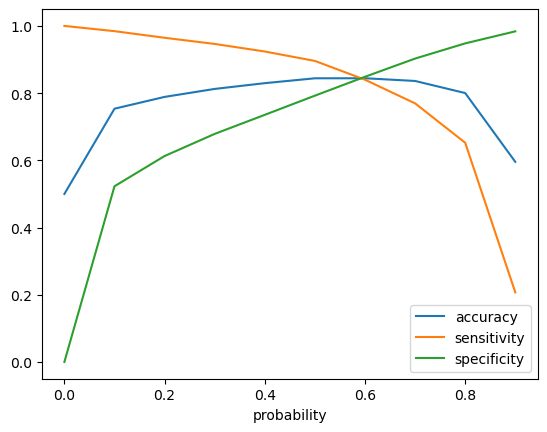

In [330]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

## <span style='color: green;'>Analysis</span>
- Accuracy - Becomes stable around 0.6
- Sensitivity - Decreases with the increased probability
- Specificity - Increases with the increasing probability

At point 0.6 where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to achieve better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking *0.5* for achieving higher sensitivity, which is our main goal.

In [331]:
probability# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,2.687411e-01,0,1,1,1,0,0,0,0,0,0,0,0
1,0,7.047483e-02,1,1,0,0,0,0,0,0,0,0,0,0
2,0,8.024370e-02,2,1,0,0,0,0,0,0,0,0,0,0
3,0,3.439222e-03,3,1,0,0,0,0,0,0,0,0,0,0
4,0,5.253815e-19,4,1,0,0,0,0,0,0,0,0,0,0


### Metrices

In [332]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[16978  4447]
 [ 2232 19193]]


In [333]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [334]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8441306884480747
Sensitivity:- 0.8958226371061844
Specificity:- 0.792438739789965


- We have got good accuracy, sensitivity and specificity on the train set prediction.

### ROC Curve (Trade off between sensitivity & specificity)

In [335]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

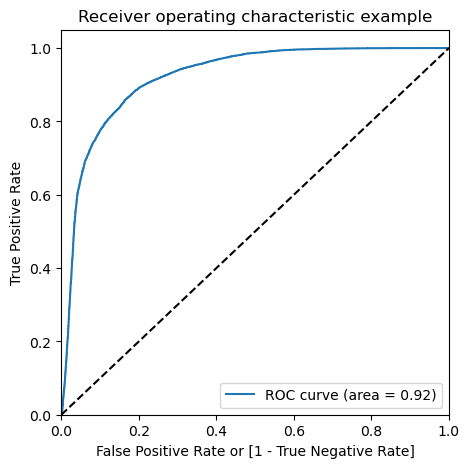

In [336]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

- We can see the area of the ROC curve is closer to 1, which is the Gini of the model.

### Testing the model on the test set

In [337]:
# Taking a copy of the test set
X_test_log = X_test.copy()
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

### Predictions on the test set with final model

In [338]:
# Predict on the test set
y_test_pred = lg_3.predict(X_test_sm)

In [339]:
y_test_pred.head()

5704     0.034015
64892    0.000578
39613    0.513564
93118    0.020480
81235    0.034115
dtype: float64

In [340]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.034015
64892,0.000578
39613,0.513564
93118,0.020480
81235,0.034115


In [341]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [342]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [343]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [344]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [345]:
y_test_pred_final.head()

,churn,CustID,0
0,0,5704,0.034015
1,0,64892,0.000578
2,0,39613,0.513564
3,0,93118,0.020480
4,0,81235,0.034115


In [346]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [351]:
y_test_pred_final.head()

,churn,CustID,churn_prob,test_predicted
0,0,5704,0.034015,0
1,0,64892,0.000578,0
2,0,39613,0.513564,1
3,0,93118,0.020480,0
4,0,81235,0.034115,0


In [352]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,churn,CustID,churn_prob,test_predicted
0,0,5704,0.034015,0
1,0,64892,0.000578,0
2,0,39613,0.513564,1
3,0,93118,0.020480,0
4,0,81235,0.034115,0


### Metrices

In [353]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4190 1158]
 [  34  159]]


In [354]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [355]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.7848763761053962
Sensitivity:- 0.8238341968911918
Specificity:- 0.7834704562453254


### <span style='color: green;'>*Model summary*</span>

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.81
    - Specificity = 0.83
- Test set
    - Accuracy = 0.78
    - Sensitivity = 0.82
    - Specificity = 0.78

Overall, the model is performing well in the test set, what it had learnt from the train set.

#### Plots of important predictors for churn and non churn customers

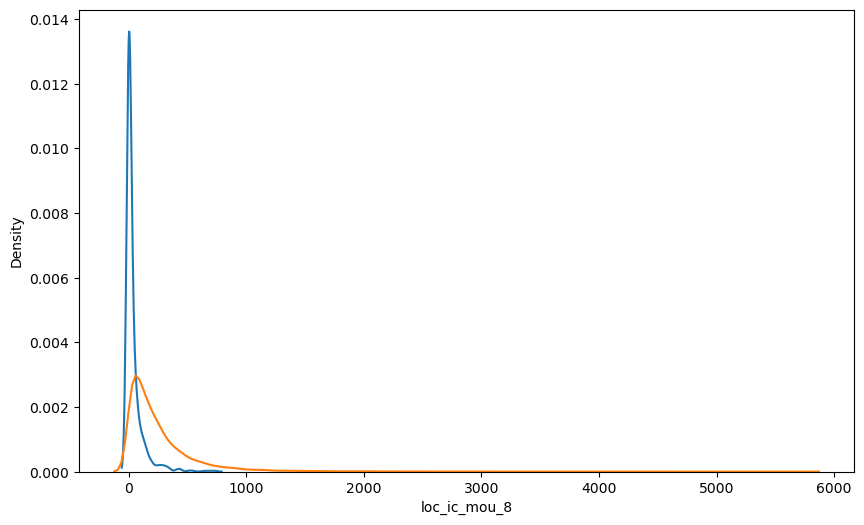

In [356]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

- We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

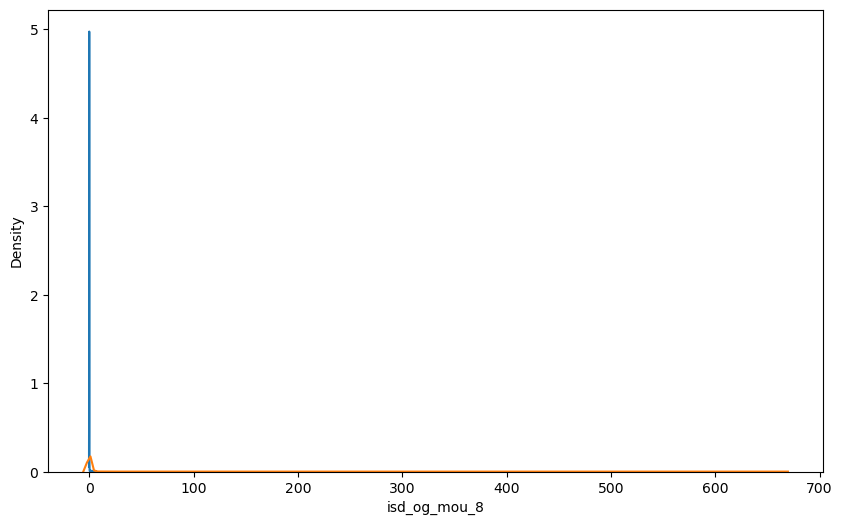

In [357]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

- We can see that the ISD outgoing minutes of usage for the month of August for churn customers is densed approximately to zero. On the onther hand for the non churn customers it is little more than the churn customers.


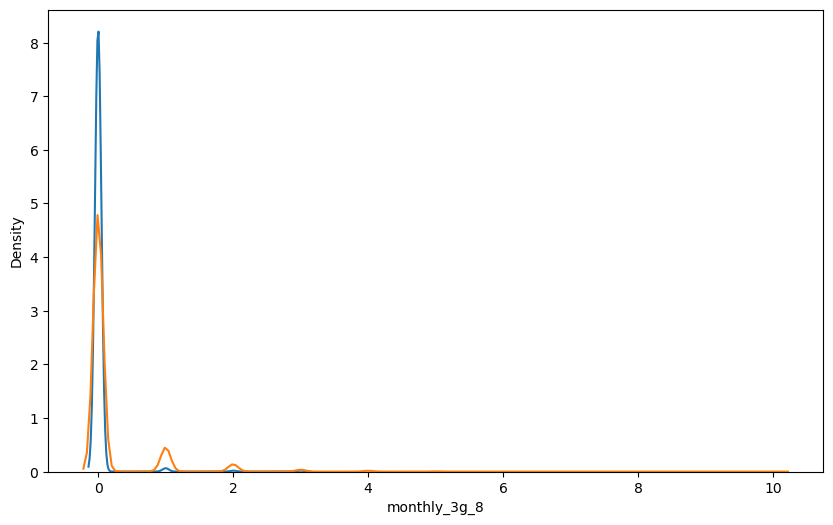

In [358]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()

- The number of mothly 3g data for August for the churn customers are very much populated aroud 1, whereas of non churn customers it spreaded accross various numbers

### <span style='color: green;'>Business Recommendations</span>

#### Top predictors
Below are few top variables selected in the logistic regression model.

| Variables	| Coefficients |
|---|---|
| loc_ic_mou_8 | -3.3287 |
| og_others_7 | -2.4711 |
| ic_others_8 | -1.5131 |
| isd_og_mou_8 | -1.3811 |
| decrease_vbc_action | -1.3293 |
| monthly_3g_8 | -1.0943 |
| std_ic_t2f_mou_8 | -0.9503 |
| monthly_2g_8 | -0.9279 |
| loc_ic_t2f_mou_8 | -0.7102 |
| roam_og_mou_8 | 0.7135 |

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:-

If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

#### Recommendations

- Target the customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
- Target the customers, whose outgoing others charge in July and incoming others on August are less.
- Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. - - Hence, these customers may be a good target to provide offer.
- Cutomers, whose monthly 3G recharge in August is more, are likely to be churned.
- Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
- Cutomers decreasing monthly 2g usage for August are most probable to churn.
- Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
- roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.